In [579]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,matthews_corrcoef
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

In [580]:
for i in range(1):
    if i==0:
        train = pd.read_pickle('salida/nuevo4f/RTEGLUE/TRAIN_'+str(i+1)+'.csv_.pickle')
    else:
        try:
            temp = pd.read_pickle('salida/nuevo4f/RTEGLUE/TRAIN_'+str(i+1)+'.csv_.pickle')
            train=pd.concat([train,temp])
        except:
            print(i+1)

In [581]:
train=train.reset_index(drop=True)
train

,distancias,entropia_total,entropias,mutinf,mearts,max_info,sumas,mutinf_t,mearts_t,max_info_t,...,list_m,list_T,Jaro-Winkler_rit,KL_divergence,negT,verbT,negH,verbH,overlap_ent,clases
0,0.000000,1.784641,0.000000,0.000000,0.000000,0.000000,0.000000,4.702695,0.000000,1.000000,...,0,6,1.000000,0.000000,0,,0,,1.000000,not_entailment
1,0.793268,2.578621,2.608111,3.808101,0.003099,0.685379,0.172401,4.532128,0.001002,0.853577,...,1,22,0.375000,0.437117,0,,0,,0.333333,entailment
2,1.220917,2.369263,1.800971,3.938110,0.005212,0.254686,0.063637,4.477281,0.000753,0.850937,...,1,21,1.000000,0.232301,0,,0,,0.000000,entailment
3,1.000016,2.055348,1.877640,3.872732,0.004151,0.363920,0.055680,4.334662,0.000853,0.818263,...,2,31,0.857143,0.061400,0,,0,,0.500000,entailment
4,0.940440,1.527320,1.293231,4.067671,0.003548,0.448161,0.044631,4.351514,0.001307,0.722905,...,2,44,0.166667,0.069412,0,,0,,0.500000,not_entailment
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2485,0.000000,1.758312,0.000000,0.000000,0.000000,0.000000,0.000000,4.702695,0.000000,1.000000,...,0,10,0.400000,0.000000,0,,0,,1.000000,not_entailment
2486,0.000000,1.655580,0.000000,0.000000,0.000000,0.000000,0.000000,3.374379,0.000794,0.603103,...,0,73,0.750000,0.000000,0,,0,,0.333333,entailment
2487,1.109871,2.747323,1.677048,3.999374,0.005211,0.383941,0.035572,4.273806,0.002357,0.654193,...,2,19,0.400000,0.509271,0,,0,,0.333333,not_entailment
2488,0.000000,1.975932,0.000000,0.000000,0.000000,0.000000,0.000000,4.500668,0.000785,0.829175,...,0,72,1.000000,0.000000,0,,0,,0.000000,entailment


In [582]:
train.columns

Index(['distancias', 'entropia_total', 'entropias', 'mutinf', 'mearts',
       'max_info', 'sumas', 'mutinf_t', 'mearts_t', 'max_info_t', 'sumas_t',
       'list_comp', 'diferencias', 'list_incomp', 'entropia_relaciones',
       'list_M', 'list_m', 'list_T', 'Jaro-Winkler_rit', 'KL_divergence',
       'negT', 'verbT', 'negH', 'verbH', 'overlap_ent', 'clases'],
      dtype='object')

<Axes: title={'center': 'max_info_t'}, xlabel='clases'>

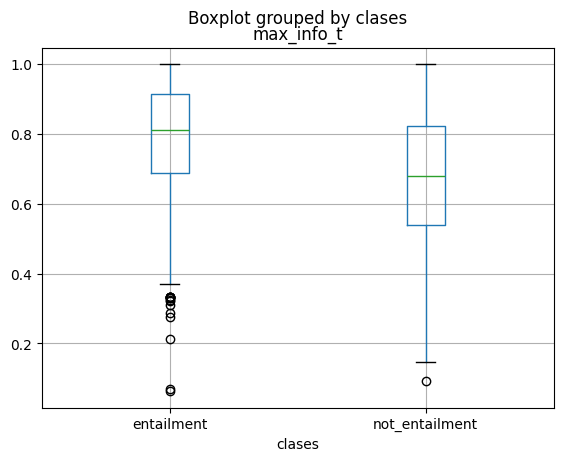

In [583]:
train.boxplot(by="clases",column="max_info_t")

## Eliminar características

In [584]:
train["mutinf"]=train["mutinf"]/train["mutinf_t"]
train["max_info"]=train["max_info"]/train["max_info_t"]
#train["mearts"]=train["mearts"]/train["mearts_t"]
#train["entropias"]=train["entropias"]/train["entropia_total"]
train["sumas"]=train["sumas"]/train["sumas_t"]
train["list_m"]=train["list_m"]/train["list_M"]
train=train.drop(["verbT","verbH","KL_divergence","entropia_total","mutinf_t","max_info_t",
                  "mearts_t","sumas_t","list_M"],axis=1)
train["mearts"]=train["mearts"]*train["distancias"]
#train=train.drop(["distancias","list_incomp","negH","max_info",'list_comp','list_T','negT'],axis=1)

<Axes: title={'center': 'max_info'}, xlabel='clases'>

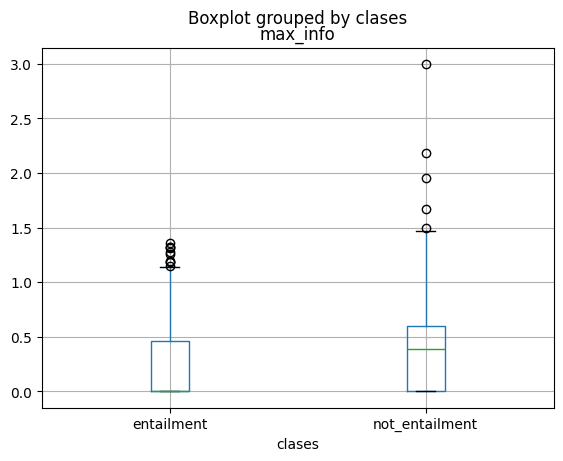

In [585]:
train.boxplot(by="clases",column="max_info")

In [586]:
#train=train.drop(["verbT","verbH"],axis=1)

In [587]:
# Diferencia entre entropia total - entropias y dejar la columna
# Quitar max_info_p
# revisar scaler y/o normalización de shape con total
#
#train=train.drop(["diferencias","list_m","list_M","list_T"],axis=1)
#train=train.drop(["Match"],axis=1)
train

,distancias,entropias,mutinf,mearts,max_info,sumas,list_comp,diferencias,list_incomp,entropia_relaciones,list_m,list_T,Jaro-Winkler_rit,negT,negH,overlap_ent,clases
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.000000,0,0.000000,0.000000,6,1.000000,0,0,1.000000,not_entailment
1,0.793268,2.608111,0.840246,0.002458,0.802949,1.090689,1,0.045455,0,0.543564,0.125000,22,0.375000,0,0,0.333333,entailment
2,1.220917,1.800971,0.879576,0.006363,0.299301,0.417081,0,0.047619,0,0.721928,0.200000,21,1.000000,0,0,0.000000,entailment
3,1.000016,1.877640,0.893433,0.004151,0.444747,0.633992,0,0.064516,0,0.863121,0.285714,31,0.857143,0,0,0.500000,entailment
4,0.940440,1.293231,0.934772,0.003337,0.619945,0.867822,1,0.045455,0,0.918296,0.333333,44,0.166667,0,0,0.500000,not_entailment
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2485,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.000000,0,0.000000,0.000000,10,0.400000,0,0,1.000000,not_entailment
2486,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1,0.000000,0,0.000000,0.000000,73,0.750000,0,0,0.333333,entailment
2487,1.109871,1.677048,0.935787,0.005784,0.586893,0.184020,1,0.105263,0,0.970951,0.400000,19,0.400000,0,0,0.333333,not_entailment
2488,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2,0.000000,0,0.000000,0.000000,72,1.000000,0,0,0.000000,entailment


In [588]:
train[(train["list_m"]!=0) & (train["clases"]=="YES")]

,distancias,entropias,mutinf,mearts,max_info,sumas,list_comp,diferencias,list_incomp,entropia_relaciones,list_m,list_T,Jaro-Winkler_rit,negT,negH,overlap_ent,clases


In [589]:
train.columns

Index(['distancias', 'entropias', 'mutinf', 'mearts', 'max_info', 'sumas',
       'list_comp', 'diferencias', 'list_incomp', 'entropia_relaciones',
       'list_m', 'list_T', 'Jaro-Winkler_rit', 'negT', 'negH', 'overlap_ent',
       'clases'],
      dtype='object')

In [590]:
#train=train.drop(["verbT","verbH"],axis=1)

In [591]:
#train=train[["max_info_t","list_m","entropia_relaciones","mutinf_t","distancias","Jaro-Winkler_rit","entropias","mearts_t",
#             "diferencias","list_comp","clases"]]

In [592]:
train=train[["negT","list_m","entropia_relaciones","mutinf","distancias","Jaro-Winkler_rit","entropias","sumas",
             "diferencias","list_comp","clases"]]

In [593]:
#train=train[["mutinf","mearts","max_info","sumas","diferencias","entropia_relaciones","Jaro-Winkler_rit","overlap_ent","clases"]]
train

,negT,list_m,entropia_relaciones,mutinf,distancias,Jaro-Winkler_rit,entropias,sumas,diferencias,list_comp,clases
0,0,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0,not_entailment
1,0,0.125000,0.543564,0.840246,0.793268,0.375000,2.608111,1.090689,0.045455,1,entailment
2,0,0.200000,0.721928,0.879576,1.220917,1.000000,1.800971,0.417081,0.047619,0,entailment
3,0,0.285714,0.863121,0.893433,1.000016,0.857143,1.877640,0.633992,0.064516,0,entailment
4,0,0.333333,0.918296,0.934772,0.940440,0.166667,1.293231,0.867822,0.045455,1,not_entailment
...,...,...,...,...,...,...,...,...,...,...,...
2485,0,0.000000,0.000000,0.000000,0.000000,0.400000,0.000000,0.000000,0.000000,0,not_entailment
2486,0,0.000000,0.000000,0.000000,0.000000,0.750000,0.000000,0.000000,0.000000,1,entailment
2487,0,0.400000,0.970951,0.935787,1.109871,0.400000,1.677048,0.184020,0.105263,1,not_entailment
2488,0,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2,entailment


In [594]:
X = train.drop(['clases'],axis=1)
y_ = train['clases']

In [595]:
# Guardar un nuevo dataframe para la correlación de variables
train_m=train.drop(['clases'],axis=1).corr(method='pearson')

In [596]:
train_m

,negT,list_m,entropia_relaciones,mutinf,distancias,Jaro-Winkler_rit,entropias,sumas,diferencias,list_comp
negT,1.000000,-0.011129,-0.023903,-0.002444,-0.020815,0.039758,-0.010496,0.030047,-0.098725,-0.031033
list_m,-0.011129,1.000000,0.858939,0.723068,0.710451,-0.474398,0.721847,0.640235,0.700026,0.054813
entropia_relaciones,-0.023903,0.858939,1.000000,0.848173,0.844186,-0.397230,0.849876,0.719425,0.601623,0.076018
mutinf,-0.002444,0.723068,0.848173,1.000000,0.930244,-0.327103,0.929392,0.838454,0.468677,0.051725
distancias,-0.020815,0.710451,0.844186,0.930244,1.000000,-0.323271,0.911006,0.724357,0.503331,0.068557
Jaro-Winkler_rit,0.039758,-0.474398,-0.397230,-0.327103,-0.323271,1.000000,-0.324818,-0.302838,-0.342567,-0.088844
entropias,-0.010496,0.721847,0.849876,0.929392,0.911006,-0.324818,1.000000,0.855852,0.490128,0.062657
sumas,0.030047,0.640235,0.719425,0.838454,0.724357,-0.302838,0.855852,1.000000,0.368656,0.061643
diferencias,-0.098725,0.700026,0.601623,0.468677,0.503331,-0.342567,0.490128,0.368656,1.000000,0.242976
list_comp,-0.031033,0.054813,0.076018,0.051725,0.068557,-0.088844,0.062657,0.061643,0.242976,1.000000


<Axes: >

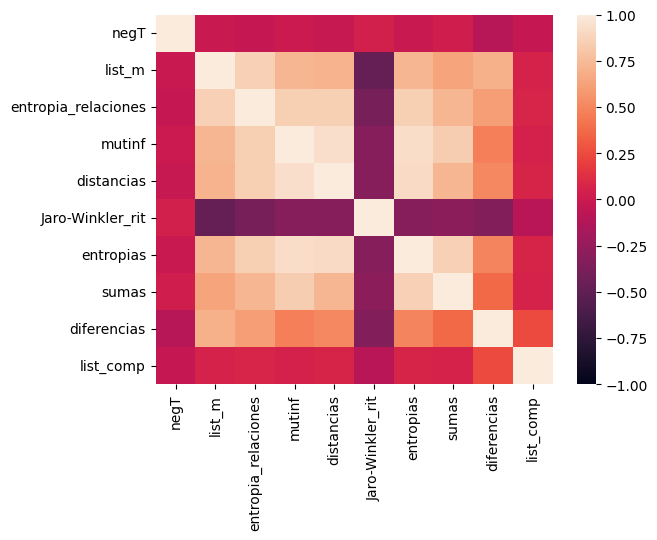

In [597]:
sns.heatmap(train_m,vmin=-1,vmax=1)

In [598]:
train_m

,negT,list_m,entropia_relaciones,mutinf,distancias,Jaro-Winkler_rit,entropias,sumas,diferencias,list_comp
negT,1.000000,-0.011129,-0.023903,-0.002444,-0.020815,0.039758,-0.010496,0.030047,-0.098725,-0.031033
list_m,-0.011129,1.000000,0.858939,0.723068,0.710451,-0.474398,0.721847,0.640235,0.700026,0.054813
entropia_relaciones,-0.023903,0.858939,1.000000,0.848173,0.844186,-0.397230,0.849876,0.719425,0.601623,0.076018
mutinf,-0.002444,0.723068,0.848173,1.000000,0.930244,-0.327103,0.929392,0.838454,0.468677,0.051725
distancias,-0.020815,0.710451,0.844186,0.930244,1.000000,-0.323271,0.911006,0.724357,0.503331,0.068557
Jaro-Winkler_rit,0.039758,-0.474398,-0.397230,-0.327103,-0.323271,1.000000,-0.324818,-0.302838,-0.342567,-0.088844
entropias,-0.010496,0.721847,0.849876,0.929392,0.911006,-0.324818,1.000000,0.855852,0.490128,0.062657
sumas,0.030047,0.640235,0.719425,0.838454,0.724357,-0.302838,0.855852,1.000000,0.368656,0.061643
diferencias,-0.098725,0.700026,0.601623,0.468677,0.503331,-0.342567,0.490128,0.368656,1.000000,0.242976
list_comp,-0.031033,0.054813,0.076018,0.051725,0.068557,-0.088844,0.062657,0.061643,0.242976,1.000000


In [599]:
# Checar variables colineales
#sns.relplot(data=train_m, x="sumas", y="mutinf")

In [600]:
# RTE3
y_train=[]
for i in y_:
    if i == "entailment":
        y_train.append(1)
    else:
        y_train.append(0)

In [601]:
scaler = preprocessing.MaxAbsScaler().fit(X)
X_scaled = scaler.transform(X)
X = X_scaled
X_train=X

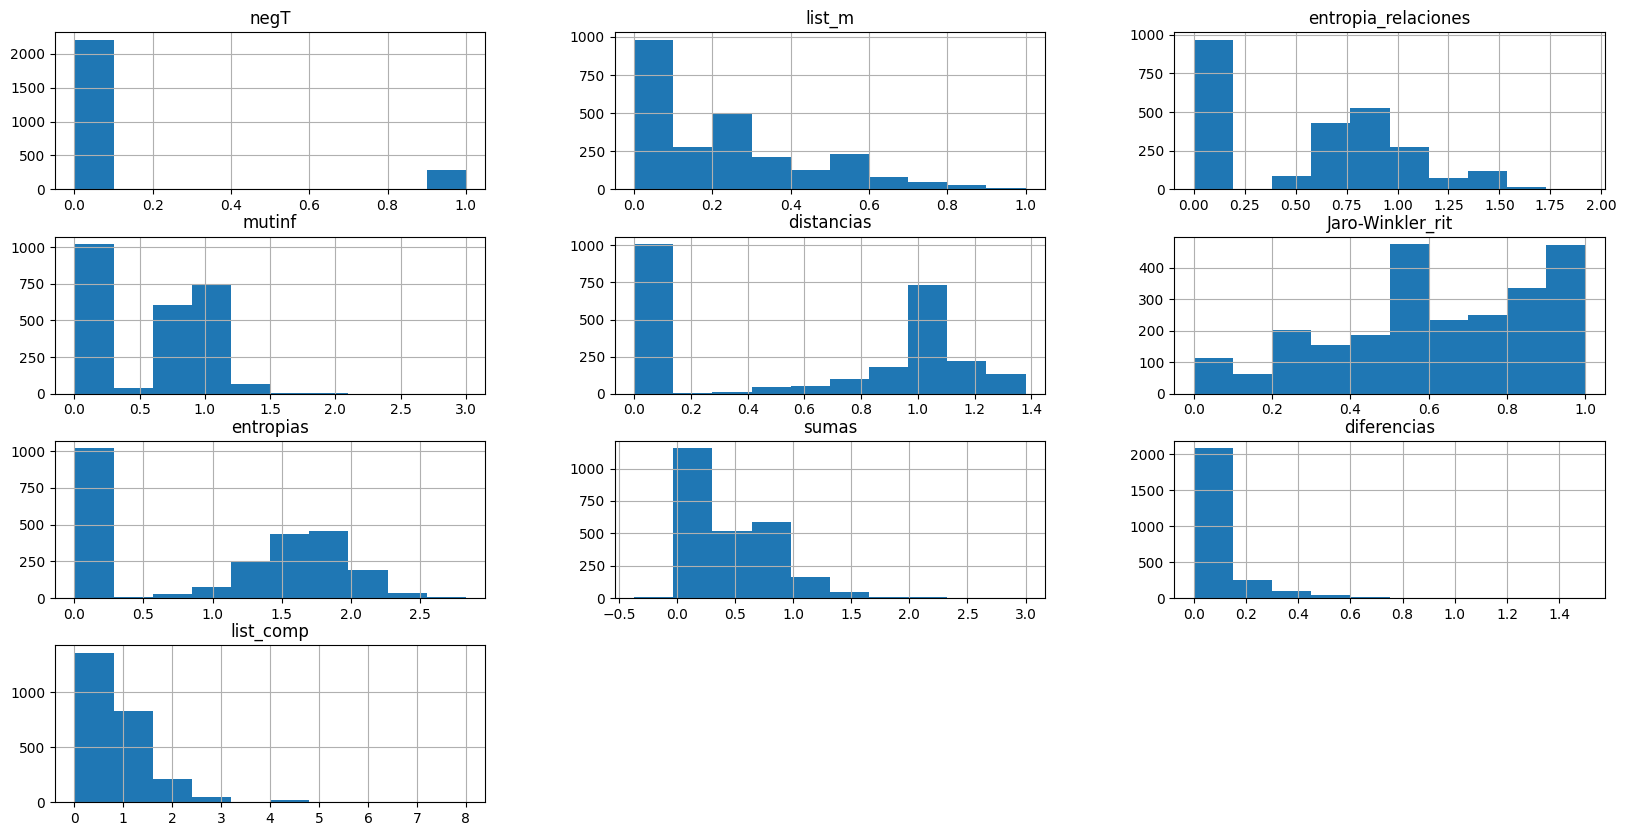

In [602]:
train.hist(figsize=(20,10))
plt.show()

# TEST

In [603]:
for i in range(1):
    if i==0:
        test = pd.read_pickle('salida/nuevo4f/RTEGLUE/DEV_'+str(i+1)+'.csv_.pickle')
    else:
        try:
            temp = pd.read_pickle('salida/nuevo4f/RTEGLUE/DEV_'+str(i+1)+'.csv_.pickle')
            test=pd.concat([test,temp])
        except:
            print(i+1)

In [604]:
test = test.reset_index(drop=True)
test

,distancias,entropia_total,entropias,mutinf,mearts,max_info,sumas,mutinf_t,mearts_t,max_info_t,...,list_m,list_T,Jaro-Winkler_rit,KL_divergence,negT,verbT,negH,verbH,overlap_ent,clases
0,0.000000,2.306973,0.000000,0.000000,0.000000,0.000000,0.000000,4.330794,0.001830,0.585814,...,0,15,1.000000,0.000000,0,,0,,0.333333,not_entailment
1,1.016558,2.290259,1.573871,3.894001,0.003192,0.483291,0.058721,4.222697,0.001304,0.741646,...,2,18,0.250000,0.201453,0,,0,,0.333333,entailment
2,1.000014,1.602743,1.562638,4.024432,0.003390,0.497577,0.042765,3.939812,0.000380,0.785368,...,1,69,0.857143,0.195164,0,,0,,0.500000,not_entailment
3,0.999998,1.868930,1.502919,3.943602,0.003980,0.200366,0.033212,4.294518,0.001715,0.591069,...,3,57,0.571429,0.083613,0,,0,,0.500000,not_entailment
4,0.000000,1.849475,0.000000,0.000000,0.000000,0.000000,0.000000,4.566742,0.001130,0.784733,...,0,15,0.714286,0.000000,0,,0,,0.750000,entailment
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
272,1.154425,2.073195,2.054585,3.941485,0.005496,0.333671,0.079486,4.650021,0.000689,0.888945,...,1,12,0.500000,0.326422,0,,0,,0.666667,entailment
273,0.723664,1.718790,1.817015,3.898449,0.002131,0.738151,0.085863,4.562471,0.000491,0.956359,...,1,25,0.500000,0.232279,0,,0,,0.333333,entailment
274,0.000000,1.745348,0.000000,0.000000,0.000000,0.000000,0.000000,3.795774,0.000000,0.800000,...,0,33,1.000000,0.000000,0,,0,,0.800000,entailment
275,0.999974,1.812120,1.738149,3.828442,0.005430,0.153807,0.024264,3.820542,0.000576,0.736258,...,1,13,0.142857,0.309501,0,,0,,0.800000,entailment


In [605]:
test["mutinf"]=test["mutinf"]/test["mutinf_t"]
test["max_info"]=test["max_info"]/test["max_info_t"]
#train["mearts"]=train["mearts"]/train["mearts_t"]
#train["entropias"]=train["entropias"]/train["entropia_total"]
test["sumas"]=test["sumas"]/test["sumas_t"]
test["list_m"]=test["list_m"]/test["list_M"]
test=test.drop(["verbT","verbH","KL_divergence","entropia_total","mutinf_t","max_info_t",
                  "mearts_t","sumas_t","list_M"],axis=1)
test["mearts"]=test["mearts"]*test["distancias"]
#test=test.drop(["distancias","list_incomp","negH","max_info",'list_comp','list_T','negT'],axis=1)

In [606]:
#test=test.drop(["verbT","verbH"],axis=1)
test

,distancias,entropias,mutinf,mearts,max_info,sumas,list_comp,diferencias,list_incomp,entropia_relaciones,list_m,list_T,Jaro-Winkler_rit,negT,negH,overlap_ent,clases
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2,0.000000,0,0.000000,0.000000,15,1.000000,0,0,0.333333,not_entailment
1,1.016558,1.573871,0.922160,0.003245,0.651647,0.472390,0,0.111111,1,0.811278,0.500000,18,0.250000,0,0,0.333333,entailment
2,1.000014,1.562638,1.021478,0.003391,0.633559,0.851094,0,0.014493,0,0.591673,0.142857,69,0.857143,0,0,0.500000,not_entailment
3,0.999998,1.502919,0.918287,0.003980,0.338989,0.564235,1,0.052632,0,0.985228,0.428571,57,0.571429,0,0,0.500000,not_entailment
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2,0.000000,0,0.000000,0.000000,15,0.714286,0,0,0.750000,entailment
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
272,1.154425,2.054585,0.847627,0.006344,0.375356,0.601736,0,0.083333,0,0.650022,0.166667,12,0.500000,0,0,0.666667,entailment
273,0.723664,1.817015,0.854460,0.001542,0.771835,1.222691,0,0.040000,1,0.650022,0.166667,25,0.500000,0,0,0.333333,entailment
274,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.000000,0,0.000000,0.000000,33,1.000000,0,0,0.800000,entailment
275,0.999974,1.738149,1.002068,0.005430,0.208904,0.218358,0,0.076923,0,0.591673,0.142857,13,0.142857,0,0,0.800000,entailment


In [607]:
#test=test[["max_info_t","list_m","entropia_relaciones","mutinf_t","distancias","Jaro-Winkler_rit","entropias","mearts_t",
#             "diferencias","list_comp","clases"]]

In [608]:
test=test[["negT","list_m","entropia_relaciones","mutinf","distancias","Jaro-Winkler_rit","entropias","sumas",
             "diferencias","list_comp","clases"]]

In [609]:
#test=test[["mutinf","mearts","max_info","sumas","diferencias","entropia_relaciones","Jaro-Winkler_rit","overlap_ent","clases"]]

In [610]:
X_t = test.drop(['clases'],axis=1)
y_t = test['clases']

In [611]:
# RTE3
y_test=[]
for i in y_t:
    if i == "entailment":
        y_test.append(1)
    else:
        y_test.append(0)

In [612]:
scaler = preprocessing.MaxAbsScaler().fit(X_t)
X_scaled = scaler.transform(X_t)
X_test = X_scaled

# MODELO DE REGRESIÓN LÓGISTICA

In [613]:
X_train = np.where(np.isnan(X_train), 0, X_train)
X_train

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.125     , 0.28282247, ..., 0.363563  , 0.03030303,
        0.125     ],
       [0.        , 0.2       , 0.37562701, ..., 0.13902708, 0.03174603,
        0.        ],
       ...,
       [0.        , 0.4       , 0.50519611, ..., 0.06134002, 0.07017544,
        0.125     ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.25      ],
       [1.        , 0.5       , 0.75921046, ..., 0.25572949, 0.11764706,
        0.        ]])

In [614]:
X_train.shape

(2490, 10)

In [615]:
model = LogisticRegression(penalty="l2", C=1)
model.fit(X_train,y_train)

LogisticRegression(C=1)

In [616]:
model.get_params()

{'C': 1,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [617]:
model.decision_function(X_train)

array([ 0.85764473,  0.93751471,  0.60799852, ..., -0.81044598,
        0.59729448, -1.34790998])

In [618]:
labels=train.columns[:-1]
labels

Index(['negT', 'list_m', 'entropia_relaciones', 'mutinf', 'distancias',
       'Jaro-Winkler_rit', 'entropias', 'sumas', 'diferencias', 'list_comp'],
      dtype='object')

In [619]:
model.classes_

array([0, 1])

In [620]:
model.coef_[0]

array([-0.28556569, -3.68984734, -0.47248569, -0.9250717 ,  0.12886789,
        0.51863971,  1.21864704,  0.63343179, -1.24128223, -1.041401  ])

In [621]:
coeficientes=model.coef_[0]

In [622]:
coeficientes

array([-0.28556569, -3.68984734, -0.47248569, -0.9250717 ,  0.12886789,
        0.51863971,  1.21864704,  0.63343179, -1.24128223, -1.041401  ])

In [623]:
print("Maximo,minimo ",np.argmax(coeficientes),labels[np.argmax(coeficientes)],np.argmin(coeficientes),labels[np.argmin(coeficientes)])

Maximo,minimo  6 entropias 1 list_m


In [624]:

n_columns=train.shape[1]-1

In [625]:
n_columns

10

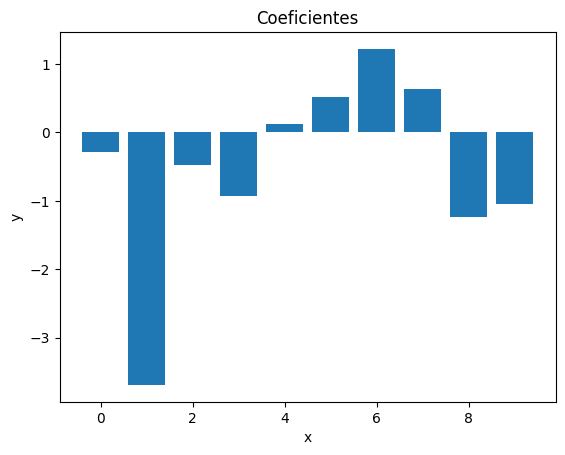

In [626]:
import matplotlib.pyplot as plt
import numpy as np

x_v = np.arange(0,n_columns,1)
y_v = coeficientes

plt.bar(x_v,y_v)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Coeficientes')
plt.show()

In [627]:
X_test = np.where(np.isnan(X_test), 0, X_test)
X_test

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.4       ],
       [0.        , 0.58333333, 0.51185951, ..., 0.2692179 , 0.13888889,
        0.        ],
       [0.        , 0.16666667, 0.37330396, ..., 0.48504382, 0.01811594,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.16666667, 0.37330396, ..., 0.12444364, 0.09615385,
        0.        ],
       [1.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [628]:
X_test.shape

(277, 10)

In [629]:
predictions = model.predict(X_test)

In [630]:
predictions

array([1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1])

In [631]:
test["predicciones"]=predictions
test


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,negT,list_m,entropia_relaciones,mutinf,distancias,Jaro-Winkler_rit,entropias,sumas,diferencias,list_comp,clases,predicciones
0,0,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2,not_entailment,1
1,0,0.500000,0.811278,0.922160,1.016558,0.250000,1.573871,0.472390,0.111111,0,entailment,0
2,0,0.142857,0.591673,1.021478,1.000014,0.857143,1.562638,0.851094,0.014493,0,not_entailment,1
3,0,0.428571,0.985228,0.918287,0.999998,0.571429,1.502919,0.564235,0.052632,1,not_entailment,0
4,0,0.000000,0.000000,0.000000,0.000000,0.714286,0.000000,0.000000,0.000000,2,entailment,1
...,...,...,...,...,...,...,...,...,...,...,...,...
272,0,0.166667,0.650022,0.847627,1.154425,0.500000,2.054585,0.601736,0.083333,0,entailment,1
273,0,0.166667,0.650022,0.854460,0.723664,0.500000,1.817015,1.222691,0.040000,0,entailment,1
274,0,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0,entailment,1
275,0,0.142857,0.591673,1.002068,0.999974,0.142857,1.738149,0.218358,0.076923,0,entailment,0


In [632]:
incorrectos = test[(test["clases"]=="entailment") & (test["predicciones"]==0)]
incorrectos

,negT,list_m,entropia_relaciones,mutinf,distancias,Jaro-Winkler_rit,entropias,sumas,diferencias,list_comp,clases,predicciones
1,0,0.500000,0.811278,9.221597e-01,1.016558,0.250000,1.573871,0.472390,0.111111,0,entailment,0
9,0,0.250000,0.811278,1.162856e+00,0.829941,0.500000,1.849869,0.899879,0.058824,0,entailment,0
13,0,0.285714,0.863121,5.449415e-01,1.136002,0.714286,1.186873,0.316522,0.076923,1,entailment,0
21,0,0.400000,0.970951,1.538672e+00,1.000010,0.600000,1.283012,1.203371,0.032258,0,entailment,0
31,0,0.500000,1.000000,9.093946e-01,0.645346,0.833333,1.149709,0.833762,0.049180,0,entailment,0
40,0,0.166667,0.650022,9.074604e-01,1.297362,0.833333,1.221695,0.501860,0.047619,1,entailment,0
46,0,0.333333,0.918296,9.090839e-01,0.745112,0.666667,2.074564,0.864495,0.117647,1,entailment,0
59,1,0.000000,0.000000,0.000000e+00,0.000000,0.625000,0.000000,0.000000,0.000000,2,entailment,0
66,0,0.400000,0.970951,9.203010e-01,0.999982,0.600000,1.831462,0.986020,0.142857,1,entailment,0
68,0,0.333333,0.918296,1.020002e+00,1.258195,0.500000,1.775549,0.875278,0.166667,4,entailment,0


In [633]:
print(confusion_matrix(y_test, predictions))

[[69 62]
 [50 96]]


In [634]:
# [[ 77  54]
#  [ 42 104]]
# acccuracy:  0.65
# precision:  0.66
# recall 0.71
# f1_score:  0.68
# matthews_score:  0.3

In [636]:
print("acccuracy: ",round(accuracy_score(y_test,predictions),2))
print("precision: ",round(precision_score(y_test,predictions),2))
print("recall",round(recall_score(y_test,predictions),2))
print("f1_score: ",round(f1_score(y_test,predictions),2))
print("matthews_score: ",round(matthews_corrcoef(y_test,predictions),2))

acccuracy:  0.6
precision:  0.61
recall 0.66
f1_score:  0.63
matthews_score:  0.19


In [637]:
X_train.shape

(2490, 10)

In [638]:
X_test.shape

(277, 10)

In [639]:
X_cv=np.concatenate((X_train, X_test), axis=0)
Y_cv=np.concatenate((y_train, y_test), axis=0)

In [640]:
validation_size = 0.20
X_train_cv, X_validation_cv, Y_train_cv, Y_validation_cv = model_selection.train_test_split(X_cv, Y_cv, test_size=validation_size)
X_train_cv=X_cv
Y_train_cv=Y_cv

In [641]:
name='Logistic Regression'
kfold = model_selection.KFold(n_splits=10)
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='accuracy')
msg = "%s: %f (%f)" % (name + " Acurracy:" , round(cv_results.mean(),2), cv_results.std())
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='precision')
msg += "\n%s: %f (%f)" % (name+ " Precision:", round(cv_results.mean(),2), cv_results.std())
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='recall')
msg += "\n%s: %f (%f)" % (name+ " Recall:", round(cv_results.mean(),2), cv_results.std())
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='f1')
msg += "\n%s: %f (%f)" % (name+ " F1-score:", round(cv_results.mean(),2), cv_results.std())
print(msg)

Logistic Regression Acurracy:: 0.650000 (0.025399)
Logistic Regression Precision:: 0.630000 (0.026612)
Logistic Regression Recall:: 0.770000 (0.041743)
Logistic Regression F1-score:: 0.690000 (0.022790)


In [410]:
# Logistic Regression Acurracy:: 0.650000 (0.025704)
# Logistic Regression Precision:: 0.630000 (0.032616)
# Logistic Regression Recall:: 0.740000 (0.037576)
# Logistic Regression F1-score:: 0.680000 (0.025473)

In [411]:
name='Logistic Regression'
kfold = model_selection.KFold(n_splits=10)
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='precision_weighted')
msg = "\n%s: %f (%f)" % (name+ " Precision:", round(cv_results.mean(),2), cv_results.std())
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='recall_weighted')
msg += "\n%s: %f (%f)" % (name+ " Recall:", round(cv_results.mean(),2), cv_results.std())
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='f1_weighted')
msg += "\n%s: %f (%f)" % (name+ " F1-score:", round(cv_results.mean(),2), cv_results.std())
print(msg)


Logistic Regression Precision:: 0.660000 (0.016843)
Logistic Regression Recall:: 0.660000 (0.016339)
Logistic Regression F1-score:: 0.650000 (0.017211)


In [412]:
name='Logistic Regression'
kfold = model_selection.KFold(n_splits=10)
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='precision_macro')
msg = "\n%s: %f (%f)" % (name+ " Precision:", round(cv_results.mean(),2), cv_results.std())
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='recall_macro')
msg += "\n%s: %f (%f)" % (name+ " Recall:", round(cv_results.mean(),2), cv_results.std())
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='f1_macro')
msg += "\n%s: %f (%f)" % (name+ " F1-score:", round(cv_results.mean(),2), cv_results.std())
print(msg)


Logistic Regression Precision:: 0.660000 (0.016454)
Logistic Regression Recall:: 0.650000 (0.016950)
Logistic Regression F1-score:: 0.650000 (0.017285)


In [413]:
name='Logistic Regression'
kfold = model_selection.KFold(n_splits=10)
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='precision_micro')
msg = "\n%s: %f (%f)" % (name+ " Precision:", round(cv_results.mean(),2), cv_results.std())
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='recall_micro')
msg += "\n%s: %f (%f)" % (name+ " Recall:", round(cv_results.mean(),2), cv_results.std())
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='f1_micro')
msg += "\n%s: %f (%f)" % (name+ " F1-score:", round(cv_results.mean(),2), cv_results.std())
print(msg)


Logistic Regression Precision:: 0.660000 (0.016339)
Logistic Regression Recall:: 0.660000 (0.016339)
Logistic Regression F1-score:: 0.660000 (0.016339)


In [414]:
name='Logistic Regression'
kfold = model_selection.KFold(n_splits=20)
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='matthews_corrcoef')
msg = "%s: %f (%f)" % (name, round(cv_results.mean(),2), cv_results.std())
print(msg)

Logistic Regression: 0.310000 (0.049906)


In [415]:
import shap
import pandas as pd
import numpy as np
shap.initjs()

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html


In [60]:
#linear_model

In [60]:
# model = LogisticRegression()
# model.fit(X_train,y_train)

LogisticRegression()

In [642]:
y_predict = model.predict(X_test)
print(classification_report( y_test,y_predict))

              precision    recall  f1-score   support

           0       0.58      0.53      0.55       131
           1       0.61      0.66      0.63       146

    accuracy                           0.60       277
   macro avg       0.59      0.59      0.59       277
weighted avg       0.59      0.60      0.59       277



In [ ]:
#   precision    recall  f1-score   support

#            0       0.64      0.57      0.60       131
#            1       0.65      0.71      0.68       146

#     accuracy                           0.64       277
#    macro avg       0.64      0.64      0.64       277
# weighted avg       0.64      0.64      0.64       277

In [571]:
explainer = shap.Explainer(model,X_train,feature_names=test.columns[:-1])
shap_values = explainer(X_test)

In [572]:
test.columns[:-1]

Index(['distancias', 'entropias', 'mutinf', 'mearts', 'max_info', 'sumas',
       'list_comp', 'diferencias', 'list_incomp', 'entropia_relaciones',
       'list_m', 'list_T', 'Jaro-Winkler_rit', 'negT', 'negH', 'overlap_ent',
       'clases'],
      dtype='object')

In [573]:
explainer.expected_value

-0.017051563321841212

In [574]:
X_test

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.33333333],
       [0.76299234, 0.61759316, 0.52313233, ..., 0.        , 0.        ,
        0.33333333],
       [0.75057563, 0.61318526, 0.57947468, ..., 0.        , 0.        ,
        0.5       ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.8       ],
       [0.75054494, 0.68205666, 0.56846328, ..., 0.        , 0.        ,
        0.8       ],
       [0.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.66666667]])

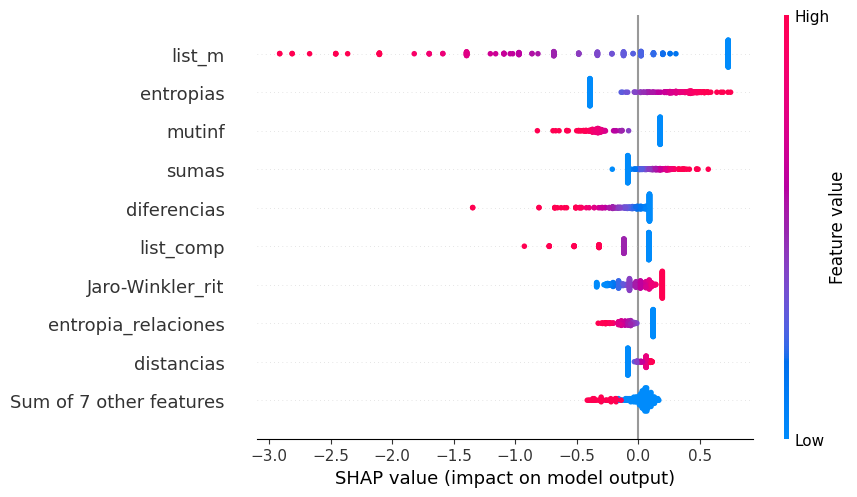

In [575]:
shap.plots.beeswarm(shap_values)

In [576]:
ind = 21
print(X_test[ind],y_test[ind],y_predict[ind])
shap.plots.force(shap_values[ind])
shap.plots.waterfall(shap_values[ind])

[0.75057232 0.50345916 0.87287363 0.1108515  0.61865825 0.68580828
 0.         0.04032258 0.         0.61260162 0.46666667 0.5210084
 0.6        0.         0.         0.33333333] 1 0


IndexError: index 16 is out of bounds for axis 0 with size 16

In [577]:
ind = 6
print(X_test[ind])
# This amazing documentary gives us a glimpse into the lives of the brave
# women in Cameroun's judicial system-- policewomen, lawyers and judges. Despite
# tremendous difficulties-- lack of means, the desperate poverty of the people, multiple
# languages and multiple legal precedents depending on the region of the country and
# the religious/ethnic background of the plaintiffs and defendants-- these brave,
# strong women are making a difference. [...]

shap.plots.waterfall(shap_values[ind,:,1])

[0.        0.        0.        0.        0.        0.        0.
 0.        0.        0.        0.        0.3697479 1.        0.
 0.        0.5      ]


IndexError: index 1 is out of bounds for axis 2 with size 1

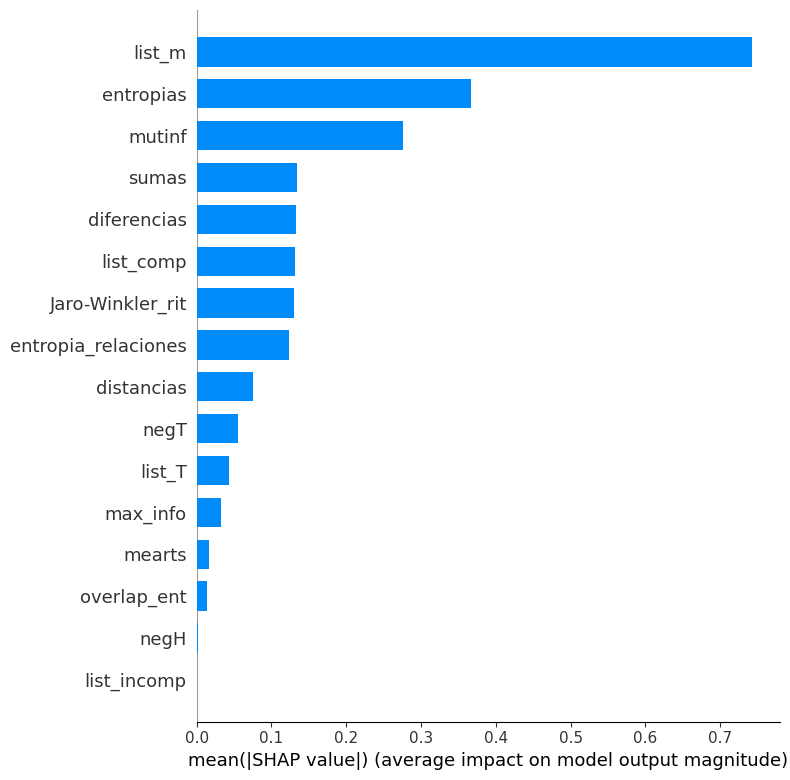

In [578]:
shap.summary_plot(shap_values, X_test,plot_type="bar")

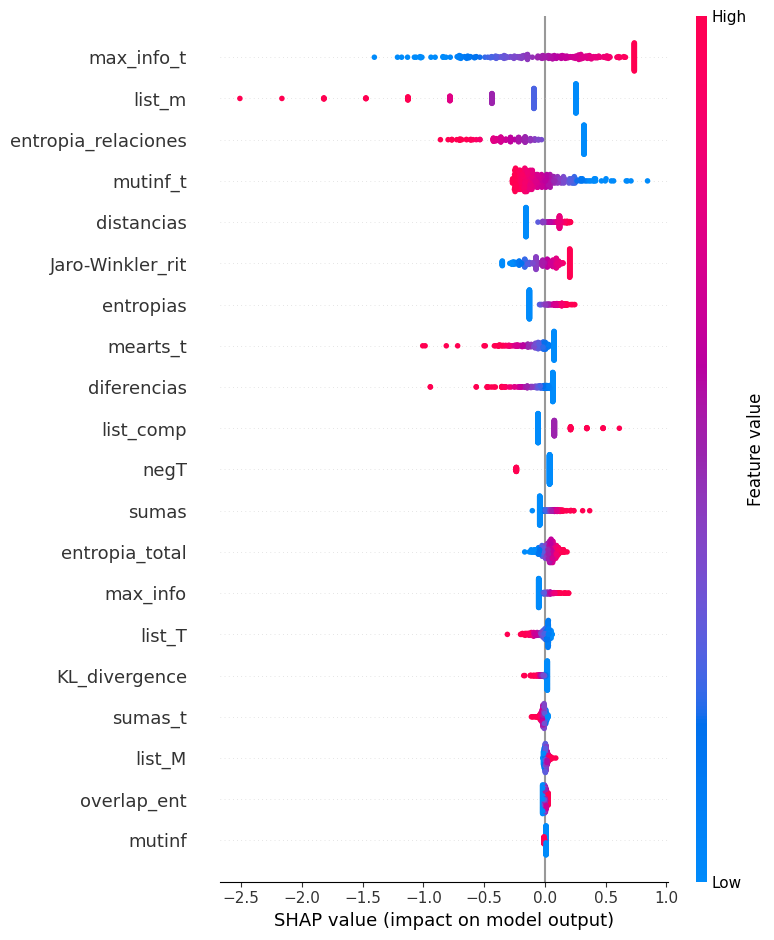

In [425]:
shap.summary_plot(shap_values[1:,], X_test[1:,])

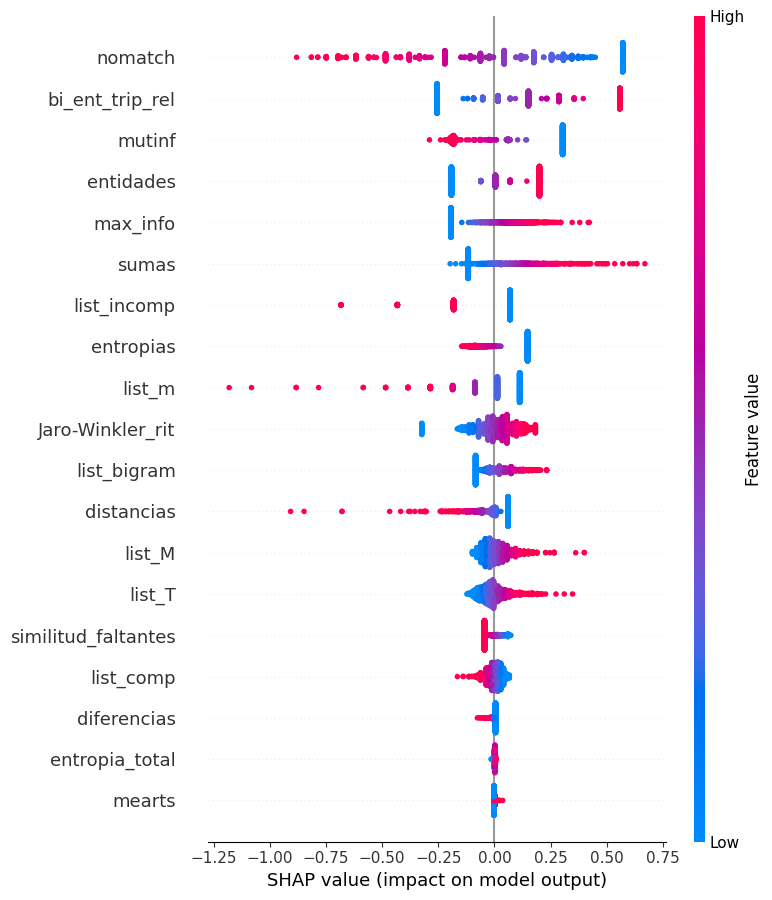

In [97]:
shap.summary_plot(shap_values, X_test,feature_names=test.columns[:-1])

In [ ]:
shap_values[2:,]

.values =
array([[ 0.00911714,  0.30959951,  0.55679351, -0.20535715,  0.21114683],
       [ 0.00911714,  0.30959951,  0.55679351, -0.20535715,  0.21114683],
       [-0.01299836, -0.11268555, -0.4045574 ,  0.04382668,  0.21114683],
       ...,
       [ 0.00911714,  0.30959951,  0.55679351, -0.20535715,  0.03866018],
       [ 0.00911714,  0.30959951,  0.55679351, -0.20535715,  0.03866018],
       [ 0.00911714,  0.30959951,  0.55679351, -0.20535715,  0.21114683]])

.base_values =
array([-0.74544388, -0.74544388, -0.74544388, -0.74544388, -0.74544388,
       -0.74544388, -0.74544388, -0.74544388, -0.74544388, -0.74544388,
       -0.74544388, -0.74544388, -0.74544388, -0.74544388, -0.74544388,
       -0.74544388, -0.74544388, -0.74544388, -0.74544388, -0.74544388,
       -0.74544388, -0.74544388, -0.74544388, -0.74544388, -0.74544388,
       -0.74544388, -0.74544388, -0.74544388, -0.74544388, -0.74544388,
       -0.74544388, -0.74544388, -0.74544388, -0.74544388, -0.74544388,
       -0.745

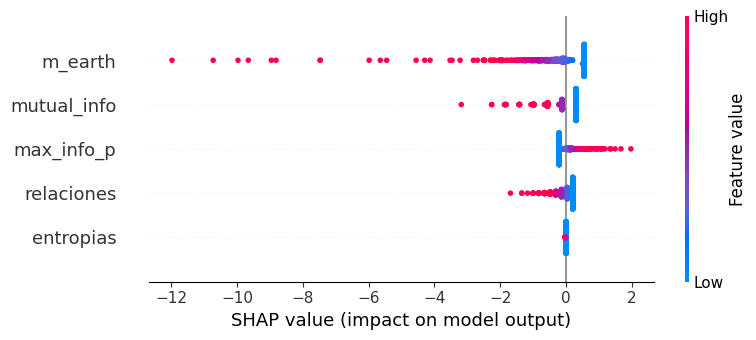

In [ ]:
shap.summary_plot(shap_values[0:,], X_test,feature_names=test.columns[:-1])

In [ ]:
explainer.expected_value

-0.7454438806409415

In [ ]:
shap_values.shape

(800, 5)

# Árbol de decisión

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [ ]:
clf = DecisionTreeClassifier(splitter="random")
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [ ]:
print("acccuracy: ",round(accuracy_score(y_test,y_pred),2))
print("precision: ",round(precision_score(y_test,y_pred),2))
print("recall",round(recall_score(y_test,y_pred),2))
print("f1_score: ",round(f1_score(y_test,y_pred),2))
print("matthews_score: ",round(matthews_corrcoef(y_test,y_pred),2))

acccuracy:  0.58
precision:  0.63
recall 0.42
f1_score:  0.51
matthews_score:  0.17


In [ ]:
validation_size = 0.01
X_train_cv, X_validation_cv, Y_train_cv, Y_validation_cv = model_selection.train_test_split(X_cv, Y_cv, test_size=validation_size)

In [ ]:
name='DecisionTree'
kfold = model_selection.KFold(n_splits=20)
cv_results = model_selection.cross_val_score(clf, X_train_cv, Y_train_cv, cv=kfold, scoring='precision')
msg = "%s: %f (%f)" % (name, round(cv_results.mean(),2), cv_results.std())
cv_results = model_selection.cross_val_score(clf, X_train_cv, Y_train_cv, cv=kfold, scoring='recall')
msg += "\n%s: %f (%f)" % (name, round(cv_results.mean(),2), cv_results.std())
cv_results = model_selection.cross_val_score(clf, X_train_cv, Y_train_cv, cv=kfold, scoring='f1')
msg += "\n%s: %f (%f)" % (name, round(cv_results.mean(),2), cv_results.std())
print(msg)

DecisionTree: 0.550000 (0.081558)
DecisionTree: 0.670000 (0.067294)
DecisionTree: 0.580000 (0.060962)


In [ ]:
c=train.columns[:-1]
confusion_matrix(y_test,y_pred)

array([[287, 103],
       [236, 174]])

Profundidad del árbol: 23
Número de nodos terminales: 152


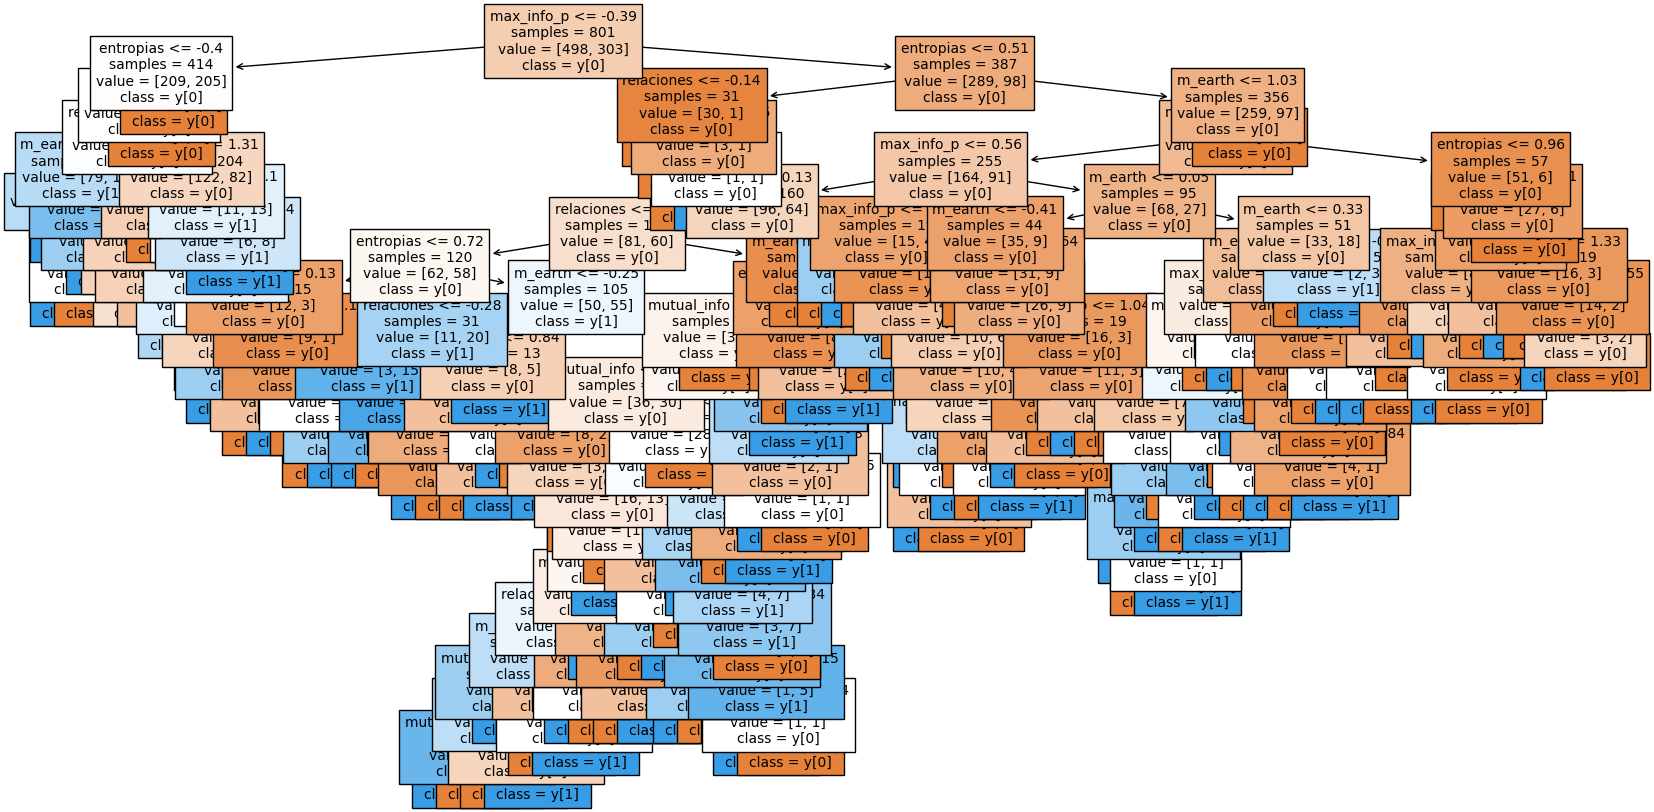

In [ ]:
# Estructura del árbol creado
import matplotlib.pyplot as plt
# ------------------------------------------------------------------------------
fig, ax = plt.subplots(figsize=(20, 10))

print(f"Profundidad del árbol: {clf.get_depth()}")
print(f"Número de nodos terminales: {clf.get_n_leaves()}")

plot = plot_tree(
            decision_tree = clf,
            feature_names = c,
            class_names   = True,
            filled        = True,
            impurity      = False,
            fontsize      = 10,
            precision     = 2,
            ax            = ax
       )